In [1]:
import re 

import numpy as np

import tweepy 

from tweepy import OAuthHandler 

from textblob import TextBlob 

import matplotlib.pyplot as plt

import pandas as pd

from wordcloud import WordCloud

from better_profanity import profanity

In [2]:
#Keys and Tokens

consumer_key = 'NTtdYMe2a2VIqStc9rHcR6Se6'
consumer_secret = 'oEsz1c56jrcC3unP27aLR0rDXY78gOs2VcGH5qCbKt2luatvBX' 
access_token = '1320609780-bqiT2OfW44VnDsZv52RyAPE1GZb98DTSjfNla0L'
access_token_secret = 'zG1ocyV899OH7Bl9vLyNw5P4Ry7XITB9jQ4CRaBo1f8bj'

In [3]:
# Access Twitter Data

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)


api = tweepy.API(auth)

In [4]:
# Input a query from the user

query = input("Please enter your topic / person of interest: ")

# Filter the query to remove retweets

filtered = query + "-filter:retweets"

# Generate the latest tweets on the given query 

tweets = tweepy.Cursor(api.search_tweets, 
                           q=filtered,
                           lang="en").items(100)

# Create a list of the tweets, the users, and their location

list1 = [[tweet.text, tweet.user.screen_name, tweet.user.location] for tweet in tweets]

Please enter your topic / person of interest: @disneycareers


In [5]:
# Convert the list into a dataframe

df = pd.DataFrame(data=list1, 
                    columns=['tweets','user', "location"])
# Convert only the tweets into a list

tweet_list = df.tweets.to_list()

In [6]:
# Create a function to clean the tweets. Remove profanity, unnecessary characters, spaces, and stopwords.

def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    r = tweet.lower()
    r = profanity.censor(r)
    r = re.sub("'", "", r) # This is to avoid removing contractions in english
    r = re.sub("@[A-Za-z0-9_]+","", r)
    r = re.sub("#[A-Za-z0-9_]+","", r)
    r = re.sub(r'http\S+', '', r)
    r = re.sub('[()!?]', ' ', r)
    r = re.sub('\[.*?\]',' ', r)
    r = re.sub("[^a-z0-9]"," ", r)
    r = r.split()
    stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from"]
    r = [w for w in r if not w in stopwords]
    r = " ".join(word for word in r)
    return r

In [7]:
cleaned = [clean_tweet(tw) for tw in tweet_list]
cleaned

/var/folders/3x/gpg82sxn2915j0thfmxs9j2h0000gn/T/ipykernel_60222/3588238994.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


['new jobs open at character designer moon girl devil dinosaur season 2',
 'how does my son get touch about possible work experience london vfx game design he ne',
 'dude never knew you did that will have look at some my old videos',
 'congrats your hard work successes',
 'retro secrets i like it',
 'congratulations you are best',
 'thats not nick cannon',
 'so so proud your journey',
 'thank you being part magic that brought main s',
 'also based your time working company i would love',
 'first time i saw you was comedy warehouse holiday spe',
 'hoisting carrying illuminated canopy as canopy carrier main street electrical parade',
 'why cant anyone tell me why is able get away with mandating vaccine',
 'i wish i had results no one can tell me why is able get away with this',
 'it should be crime that fl is forcing my',
 'why is allowed mandate vaccine florida they hired',
 'after applying what feels like mountain roles over past 2 years i find it surprising i',
 '2019 alum james lloyd

In [8]:
# Define the sentiment objects using TextBlob

sentiment_objects = [TextBlob(tweet) for tweet in cleaned]

sentiment_objects[0].polarity, sentiment_objects[0]

(0.06818181818181818,
 TextBlob("new jobs open at character designer moon girl devil dinosaur season 2"))

In [9]:
# Create a list of polarity values and tweet text

sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

# Print the value of the 0th row.

sentiment_values[0]
# Print all the sentiment values

sentiment_values[0:99]

[[0.06818181818181818,
  'new jobs open at character designer moon girl devil dinosaur season 2'],
 [-0.2,
  'how does my son get touch about possible work experience london vfx game design he ne'],
 [0.1, 'dude never knew you did that will have look at some my old videos'],
 [-0.2916666666666667, 'congrats your hard work successes'],
 [0.0, 'retro secrets i like it'],
 [1.0, 'congratulations you are best'],
 [0.0, 'thats not nick cannon'],
 [0.8, 'so so proud your journey'],
 [0.3333333333333333, 'thank you being part magic that brought main s'],
 [0.5, 'also based your time working company i would love'],
 [0.25, 'first time i saw you was comedy warehouse holiday spe'],
 [-0.04166666666666667,
  'hoisting carrying illuminated canopy as canopy carrier main street electrical parade'],
 [0.5, 'why cant anyone tell me why is able get away with mandating vaccine'],
 [0.5,
  'i wish i had results no one can tell me why is able get away with this'],
 [0.0, 'it should be crime that fl is for

In [10]:
# Create a dataframe of each tweet against its polarity

sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df

,polarity,tweet
0,0.068182,new jobs open at character designer moon girl ...
1,-0.200000,how does my son get touch about possible work ...
2,0.100000,dude never knew you did that will have look at...
3,-0.291667,congrats your hard work successes
4,0.000000,retro secrets i like it
5,1.000000,congratulations you are best
6,0.000000,thats not nick cannon
7,0.800000,so so proud your journey
8,0.333333,thank you being part magic that brought main s
9,0.500000,also based your time working company i would love


In [11]:
# Save the polarity column as 'n'.

n=sentiment_df["polarity"]

# Convert this column into a series, 'm'. 

m=pd.Series(n)

m

0     0.068182
1    -0.200000
2     0.100000
3    -0.291667
4     0.000000
5     1.000000
6     0.000000
7     0.800000
8     0.333333
9     0.500000
10    0.250000
11   -0.041667
12    0.500000
13    0.500000
14    0.000000
15    0.000000
16    0.225000
17    0.000000
18    0.500000
19    0.068182
20    0.187500
21    0.000000
22   -0.181818
23    0.000000
24    0.136364
25    0.136364
26    0.000000
27    0.000000
28    0.000000
29    0.000000
30    0.000000
31    0.000000
32    0.000000
33    0.000000
34    0.136364
35    0.078788
36    0.500000
37    0.000000
38    0.000000
39    0.000000
40    0.312121
Name: polarity, dtype: float64

In [12]:
# Initialize variables, 'pos', 'neg', 'neu'.

pos=0
neg=0
neu=0

# Create a loop to classify the tweets as Positive, Negative, or Neutral.
# Count the number of each.

for items in m:
    if items>0:
        print("Positive")
        pos=pos+1
    elif items<0:
        print("Negative")
        neg=neg+1
    else:
        print("Neutral")
        neu=neu+1
        
print(pos,neg,neu)

Positive
Negative
Positive
Negative
Neutral
Positive
Neutral
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Neutral
Neutral
Positive
Neutral
Positive
Positive
Positive
Neutral
Negative
Neutral
Positive
Positive
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Positive
Positive
Positive
Neutral
Neutral
Neutral
Positive
19 4 18


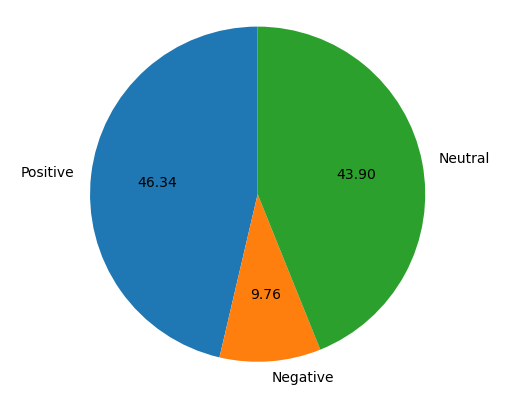

In [13]:
pieLabels=["Positive","Negative","Neutral"]

populationShare=[pos,neg,neu]

figureObject, axesObject = plt.subplots()

axesObject.pie(populationShare,labels=pieLabels,autopct='%1.2f',startangle=90)

axesObject.axis('equal')

plt.show()

In [14]:
# Display the number of twitter users who feel a certain way about the given topic.

print("%f percent of twitter users feel positive about %s"%(pos,query))

print("%f percent of twitter users feel negative about %s"%(neg,query))

print("%f percent of twitter users feel neutral about %s"%(neu,query))

19.000000 percent of twitter users feel positive about @disneycareers
4.000000 percent of twitter users feel negative about @disneycareers
18.000000 percent of twitter users feel neutral about @disneycareers


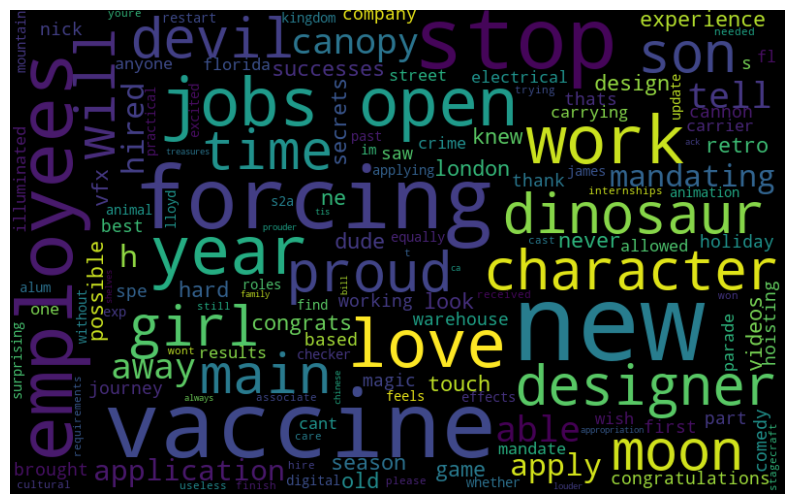

In [15]:
# Create a Wordcloud from the tweets

all_words = ' '.join([text for text in cleaned])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()